In [1]:
%%capture
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()
# Read your api key environment variable
my_key = os.getenv("NEWS_API")

In [3]:
from newsapi import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key=my_key)

In [4]:
# Fetch the SupplyChain news articles
SupplyChains = newsapi.get_everything(q="Technology & Supply chains", language="en")
# Print total articles
print(f"Total articles about SupplyChains: {SupplyChains['totalResults']}")

Total articles about SupplyChains: 1891


In [5]:
# Create the Supply Chain sentiment scores DataFrame
SupplyChain_sentiments = []

for article in SupplyChains["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        SupplyChain_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
df_SupplyChain = pd.DataFrame(SupplyChain_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative","neutral","positive", "text" ]
df_SupplyChain = df_SupplyChain[cols]

df_SupplyChain.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,The US is still heavily dependent on other cou...
1,-0.1027,0.110,0.819,0.071,(CNN)President Joe Biden wants his administrat...
2,-0.3818,0.071,0.929,0.000,"LiveUpdated Feb. 24, 2021, 8:51 a.m. ET\r\nFeb..."
3,0.7096,0.000,0.780,0.220,"A new fund has launched, with backing from the..."
4,-0.0772,0.058,0.893,0.049,And Congress is moving forward with a plan of ...


In [6]:
df_SupplyChain.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.000300,0.056750,0.879750,0.063500
std,0.417351,0.072182,0.093543,0.072305
min,-0.726900,0.000000,0.732000,0.000000
25%,-0.186300,0.000000,0.804500,0.000000
50%,0.000000,0.000000,0.878000,0.057000
75%,0.129000,0.113750,0.976000,0.087250
max,0.771700,0.200000,1.000000,0.235000


In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')

True

In [8]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', str(text))
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [10]:
# Create a new tokens column for Supply Chain
df_SupplyChain["tokens"] = df_SupplyChain.text.apply(tokenizer)
df_SupplyChain.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,The US is still heavily dependent on other cou...,"[us, still, heavily, dependent, country, techn..."
1,-0.1027,0.110,0.819,0.071,(CNN)President Joe Biden wants his administrat...,"[cnn, president, joe, biden, want, administrat..."
2,-0.3818,0.071,0.929,0.000,"LiveUpdated Feb. 24, 2021, 8:51 a.m. ET\r\nFeb...","[liveupdated, feb, et, feb, et, president, bid..."
3,0.7096,0.000,0.780,0.220,"A new fund has launched, with backing from the...","[new, fund, ha, launched, backing, singaporean..."
4,-0.0772,0.058,0.893,0.049,And Congress is moving forward with a plan of ...,"[congress, moving, forward, plan, president, b..."


In [11]:
# Create a new tokens column for SupplyChain
df_SupplyChain["tokens"] = df_SupplyChain.text.apply(tokenizer)
df_SupplyChain.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,The US is still heavily dependent on other cou...,"[us, still, heavily, dependent, country, techn..."
1,-0.1027,0.110,0.819,0.071,(CNN)President Joe Biden wants his administrat...,"[cnn, president, joe, biden, want, administrat..."
2,-0.3818,0.071,0.929,0.000,"LiveUpdated Feb. 24, 2021, 8:51 a.m. ET\r\nFeb...","[liveupdated, feb, et, feb, et, president, bid..."
3,0.7096,0.000,0.780,0.220,"A new fund has launched, with backing from the...","[new, fund, ha, launched, backing, singaporean..."
4,-0.0772,0.058,0.893,0.049,And Congress is moving forward with a plan of ...,"[congress, moving, forward, plan, president, b..."


In [12]:
from collections import Counter
from nltk import ngrams

In [13]:
# Generate the Supply Chain N-grams where N=2
processed_SupplyChain = tokenizer(df_SupplyChain['tokens'])
bigrams_count = Counter(ngrams(processed_SupplyChain, n=2))
bigrams_SupplyChain = (dict(bigrams_count))
bigrams_SupplyChain

{('u', 'still'): 1,
 ('still', 'heavily'): 1,
 ('heavily', 'dependent'): 1,
 ('dependent', 'country'): 1,
 ('country', 'techn'): 1,
 ('techn', 'cnn'): 1,
 ('cnn', 'president'): 1,
 ('president', 'joe'): 5,
 ('joe', 'biden'): 4,
 ('biden', 'want'): 1,
 ('want', 'administrat'): 1,
 ('administrat', 'liveupdated'): 1,
 ('liveupdated', 'feb'): 1,
 ('feb', 'et'): 2,
 ('et', 'feb'): 1,
 ('et', 'president'): 1,
 ('president', 'bid'): 1,
 ('bid', 'new'): 1,
 ('new', 'fund'): 1,
 ('fund', 'ha'): 1,
 ('ha', 'launched'): 1,
 ('launched', 'backing'): 1,
 ('backing', 'singaporean'): 1,
 ('singaporean', 'congress'): 1,
 ('congress', 'moving'): 1,
 ('moving', 'forward'): 1,
 ('forward', 'plan'): 1,
 ('plan', 'president'): 1,
 ('president', 'b'): 1,
 ('b', 'weak'): 1,
 ('weak', 'link'): 1,
 ('link', 'supply'): 1,
 ('supply', 'chain'): 2,
 ('chain', 'underscored'): 1,
 ('underscored', 'impor'): 1,
 ('impor', 'enlarge'): 1,
 ('enlarge', 'president'): 1,
 ('biden', 'signing'): 1,
 ('signing', 'diff'): 1,


In [14]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [15]:
SupplyChain_token = tokenizer(df_SupplyChain.text.str.cat())
# Get the top 10 words for Supply Chain
SupplyChain_ten = str(token_count(SupplyChain_token, 10))
SupplyChain_ten

"[('char', 20), ('reuters', 10), ('president', 8), ('ha', 7), ('biden', 6), ('joe', 5), ('supply', 5), ('chain', 5), ('u', 5), ('shortage', 4)]"

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'SupplyChain Word Cloud')

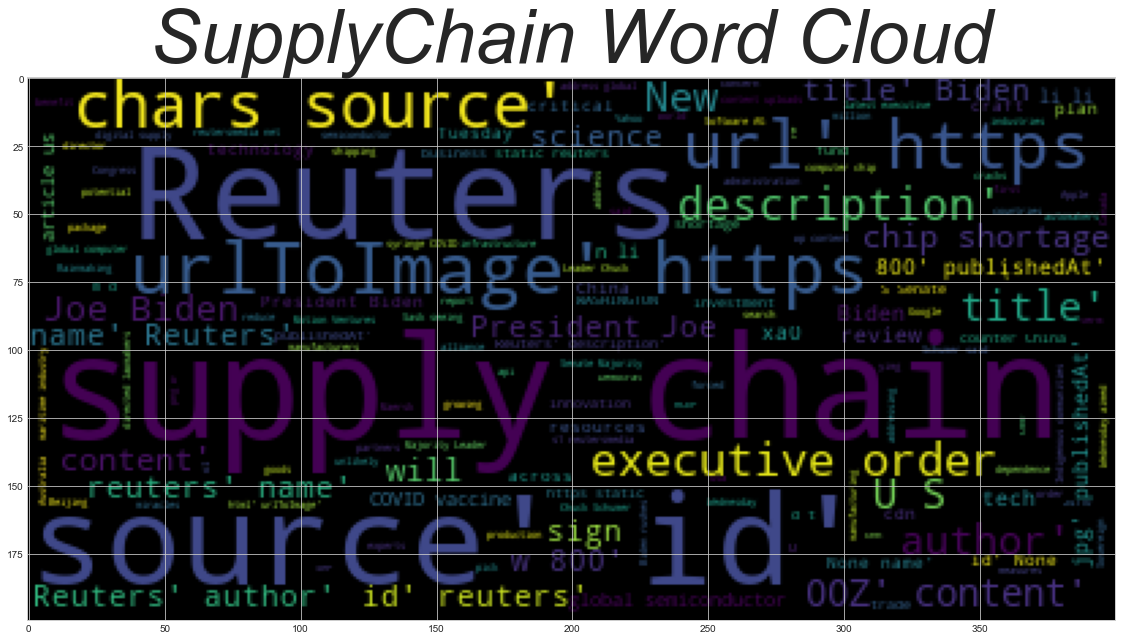

In [17]:
# Generate the Supply Chain word cloud
wc = WordCloud().generate(str(SupplyChains))
plt.imshow(wc)
plt.title("SupplyChain Word Cloud", fontsize=75, fontstyle='italic')

In [18]:
import spacy
from spacy import displacy

In [19]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [20]:
# Concatenate all of the Supply Chain text together
SupplyChain_ner = df_SupplyChain['text'].str.cat()

In [21]:
# Run the NER processor on all of the text
processed_article = nlp(SupplyChain_ner)
# Add a title to the document
processed_article.user_data['title'] = 'Supply Chain'

In [22]:
# Render the visualization
displacy.render(processed_article, style='ent')